<a href="https://colab.research.google.com/github/ThierrryScotto/deep-learning-simpsons/blob/main/rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns  # lib de graficos
import matplotlib.pyplot as plt
tf.__version__

'2.8.0'

In [18]:
dataset = pd.read_csv('personagens.csv')

In [19]:
dataset.shape

(293, 7)

# New Section

In [20]:
# visualizar os 5 primeiros dados
dataset.head

<bound method NDFrame.head of      laranja_camisa_bart  azul_calcao_bart  ...  cinza_sapato_homer  classe
0               6.886102          3.495204  ...            0.062954    Bart
1               5.004901          3.183889  ...            0.033024    Bart
2               5.264620          5.029683  ...            0.151573    Bart
3               0.000000          0.000000  ...            0.021164    Bart
4               8.978929          3.459119  ...            0.011593    Bart
..                   ...               ...  ...                 ...     ...
288             0.000000          0.000000  ...            0.093921   Homer
289             0.000000          0.000000  ...            0.042194   Homer
290             0.000000          0.000000  ...            0.076761   Homer
291             0.000000          0.000000  ...            0.017013   Homer
292             0.000000          0.000000  ...            0.063546   Homer

[293 rows x 7 columns]>

In [21]:
# visualizar os 5 ultimos
dataset.tail()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
288,0.0,0.0,0.0,0.000000,6.485412,0.093921,Homer
289,0.0,0.0,0.0,0.000000,0.000000,0.042194,Homer
290,0.0,0.0,0.0,0.000000,4.263629,0.076761,Homer
291,0.0,0.0,0.0,0.000000,1.429134,0.017013,Homer
292,0.0,0.0,0.0,13.744248,0.853902,0.063546,Homer


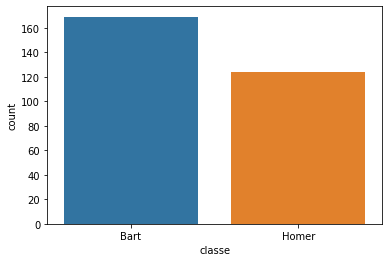

In [22]:
sns.countplot( x = 'classe', data=dataset)

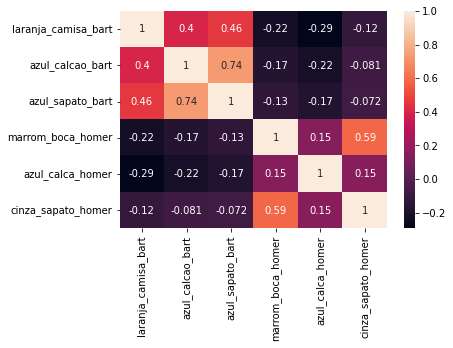

In [23]:
# grafico que indica o quanto uma váriavel está relacionada a outra 
sns.heatmap(dataset.corr(), annot=True)

In [24]:
# definimos quais colunas queremos pegar do dataset
# [:, 0:6] pega todas as colunas de 0 a 5
X = dataset.iloc[:, 0:6].values
X

array([[ 6.886102  ,  3.4952044 ,  1.4849836 ,  0.        ,  0.        ,
         0.06295441],
       [ 5.004901  ,  3.1838887 ,  1.0001415 ,  0.        ,  0.        ,
         0.03302354],
       [ 5.2646203 ,  5.0296826 ,  0.283567  ,  0.        ,  0.        ,
         0.15157256],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2636285 ,
         0.07676148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.4291335 ,
         0.01701349],
       [ 0.        ,  0.        ,  0.        , 13.744248  ,  0.853902  ,
         0.0635462 ]])

In [25]:
# Pega a coluna 6 somente
y = dataset.iloc[:, 6].values
y

array(['Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
      

In [26]:
# converter as classes para binarios Bar- True Hommer-False
y = (y == 'Bart')
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [27]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2)

In [28]:
X_treinamento.shape, y_treinamento.shape

((234, 6), (234,))

In [29]:
X_teste.shape, y_teste.shape

((59, 6), (59,))

**Contrução e treinamento da Rede Neural**

In [30]:
# (entradas + saídas) / 2
# 6 -> 4 -> 4-> 4 -> 1

In [31]:
# estrutura da rede neural
# dense: define que todos os neuronios sejam conectados

rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=(6,)))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [32]:
rede_neural.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [33]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [45]:
historico = rede_neural.fit(X_treinamento, y_treinamento, epochs=50, validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 0s 15ms/step - loss: 0.2746 - accuracy: 0.9000 - val_loss: 0.1699 - val_accuracy: 1.0000
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2741 - accuracy: 0.9000 - val_loss: 0.1690 - val_accuracy: 1.0000
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2736 - accuracy: 0.9000 - val_loss: 0.1682 - val_accuracy: 1.0000
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2731 - accuracy: 0.9000 - val_loss: 0.1676 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2727 - accuracy: 0.8952 - val_loss: 0.1670 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2722 - accuracy: 0.8952 - val_loss: 0.1663 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2717 - accuracy: 0.8952 - val_loss: 0.1655 - val_accuracy: 1.0000
Epoch 8/50
7/7 [=================

In [47]:
historico.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

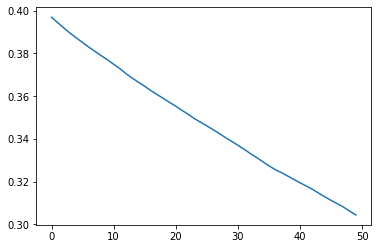

In [43]:
plt.plot(historico.history['val_loss'])

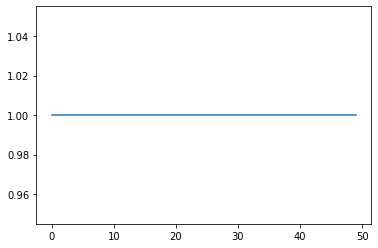

In [48]:
plt.plot(historico.history['val_accuracy'])

In [ ]:
previsoes = rede_neural.predict(X_teste)
previsoes

In [59]:
# 0 false - Hommer 
# 1 true - Bart

previsoes = (previsoes > 0.5)
previsoes[:10]

array([[ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False]])

In [60]:
y_teste[:10]

array([False, False,  True,  True, False,  True,  True,  True, False,
       False])

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.8135593220338984

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)

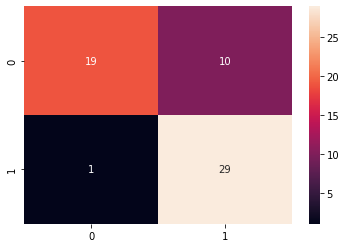

In [73]:
sns.heatmap(cm, annot=True)